# Assigning Customers To a Certain Customer Categories based on the total value of orders they have placed, to know most valuable customer

In [1]:
# Importing All Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Dataset with latin encoding
data=pd.read_csv('data.csv',encoding='latin1')

In [3]:
# Observe Data Carefully
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.shape

(541909, 8)

In [6]:
# Observing ALL Columns in details
print(data['Country'].value_counts())
print(data['CustomerID'].value_counts())
print(data['UnitPrice'].value_counts())
print(data['InvoiceDate'].value_counts())
print(data['Quantity'].value_counts())
print(data['StockCode'].value_counts())
print(data['InvoiceNo'].value_counts())

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# Data Preproccessing

In [7]:
# there are 8 columns present in dataset 

In [8]:
#Identifying Null Values In the dataset 
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#Handling null values by replacing with mode imputation 
data.CustomerID.mode()
data.Description.mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [10]:
data['CustomerID'] = data['CustomerID'].fillna(data['CustomerID'].mode()[0])

In [11]:
data['Description'] = data['Description'].fillna(data['Description'].mode()[0])

In [12]:
# now all null Values are cleared
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
# To convert Categorical Value I'm using Label Encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Country']=le.fit_transform(data['Country'])

In [14]:
# Now, 'InvoiceDate' present in object type so I'm converting it into Datetime type by importing datetime library
from datetime import datetime

In [15]:
data['InvoiceDate']=pd.to_datetime(data.InvoiceDate)

In [16]:
# observe table again
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,36
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,36
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,36
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,36
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,36


In [17]:
# There are some mix values present in the 'InvoiceNo' & 'InvoiceNo' column So Extracting These Values Wthout removing it
# and convert them into int type
data['StockCode']=data['StockCode'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [18]:
# Again checking mix values
data[pd.DataFrame(data.InvoiceNo.str.isdigit())['InvoiceNo']==False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,NaN,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,36
154,C536383,35004.0,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,36
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,36
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,36
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,36
...,...,...,...,...,...,...,...,...
540449,C581490,23144.0,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,36
541541,C581499,NaN,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,36
541715,C581568,21258.0,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,36
541716,C581569,84978.0,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,36


In [19]:
data['InvoiceNo']=data['InvoiceNo'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [20]:
data['CustomerID']=pd.to_numeric(data['CustomerID'],errors='coerce').astype(int)

In [21]:
# observe table again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  int32         
 1   StockCode    539113 non-null  float64       
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(1)
memory usage: 26.9+ MB


In [22]:
# Due to Extraction some null values still present so again imputing with mode

In [23]:
data['StockCode']=data['StockCode'].fillna(data['StockCode'].mode()[0]).astype(int)

In [24]:
# Converting Negative Values to Positive value because i thing qty. is not negative
data['Quantity']=data['Quantity'].abs()

In [25]:
# Now finding Total_spent
Total_spent=np.array(data['UnitPrice']*data['Quantity'])

In [26]:
# Adding Column 'Total_spent'
data['Total_spent']=Total_spent

In [27]:
# observing data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_spent
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,36,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,36,20.34
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,36,22.00
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,36,20.34
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,36,20.34


In [28]:
# By Observing Above data i found Duplicate values so Generating Auxiliary Dataset From Parent Modified Data Set 
# by treating duplicate Values
ids=[]
data_first=[]
for i in list(data["CustomerID"].unique()):
    tmp=data[data["CustomerID"] == i]
    ids.append(i)
    data_first.append(tmp["Total_spent"].sum())
new_df=pd.DataFrame({"CustomerID":ids,"Total_spent":data_first})

In [29]:
new_df['Total_spent'].sort_values(ascending=False)

32      2060265.28
2653     336942.10
908      280923.02
450      262876.11
402      201619.41
           ...    
1547          3.75
3512          2.95
211           2.55
182           1.25
4295          0.00
Name: Total_spent, Length: 4372, dtype: float64

In [30]:
# Observing new dataset
new_df.reset_index().head()

,index,CustomerID,Total_spent
0,0,17850,5493.79
1,1,13047,3395.98
2,2,12583,7375.42
3,3,13748,948.25
4,4,15100,1116.90


In [31]:
new_df.describe()

,CustomerID,Total_spent
count,4372.000000,4.372000e+03
mean,15299.677722,2.639838e+03
std,1722.390705,3.284477e+04
min,12346.000000,0.000000e+00
25%,13812.750000,3.085700e+02
50%,15300.500000,6.779750e+02
75%,16778.250000,1.696285e+03
max,18287.000000,2.060265e+06


In [32]:
# lets now Assigning Customers According to Total Values they spend So i spliting dataset into four Parts
Q1=new_df['Total_spent'].quantile(0.25)
Q2=new_df['Total_spent'].quantile(0.5)
Q3=new_df['Total_spent'].quantile(0.75)
print(Q1)
print(Q2)
print(Q3)

308.57
677.9750000000001
1696.2849999999999


In [33]:
# Here i have assigned Grades 'Diamond','Gold','Platinum','Silver', based on Total_spent
grade=[]
for i in new_df['Total_spent']:
    if i<=Q1:
        grade.append('Platinum')
    elif i<=Q2:
        grade.append('Silver')
    elif i<=Q3:
        grade.append('Gold')
    else:
        grade.append('Diamond')
Grades=np.array(grade)
Grades

array(['Diamond', 'Diamond', 'Diamond', ..., 'Silver', 'Platinum', 'Gold'],
      dtype='<U8')

In [34]:
# here i assigned all customers as per Total_spent they spent...lets look..
new_df['Label']=Grades
new_df.sort_values(by="Total_spent",ascending=False)

,CustomerID,Total_spent,Label
32,17841,2060265.28,Diamond
2653,16446,336942.10,Diamond
908,14646,280923.02,Diamond
450,18102,262876.11,Diamond
402,17450,201619.41,Diamond
...,...,...,...
1547,16738,3.75,Platinum
3512,16428,2.95,Platinum
211,14679,2.55,Platinum
182,16995,1.25,Platinum


In [35]:
# further we can observe there are equal qty of customers for each group
new_df['Label'].value_counts()

Diamond     1093
Gold        1093
Silver      1093
Platinum    1093
Name: Label, dtype: int64

In [36]:
# checking null values if any..
new_df.isnull().any()

CustomerID     False
Total_spent    False
Label          False
dtype: bool

In [38]:
#now for quick analysis how much 
df=new_df['Label'].value_counts().rename_axis('Label').reset_index(name='counts')
df.head(10)

,Label,counts
0,Diamond,1093
1,Gold,1093
2,Silver,1093
3,Platinum,1093


# so , this is all...

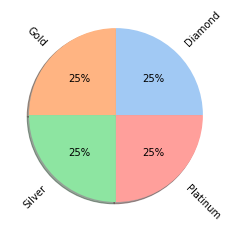

In [45]:
colors = sns.color_palette('pastel')
plt.pie(df['counts'], labels=df['Label'], colors=colors,autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.show()